# Marketing campaign optimisation

# Dataset


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../Data/store.csv', index_col=0)
data.head()

,REC,FRE,MON,CC_CARD,AVRG,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
CUSTOMER,,,,,,,,,,,,,,,,,,,,,
1,208,2,368.46,0,184.23,0.18,0.00,0.00,0.30,0.0,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
2,6,4,258.00,1,64.50,0.26,0.16,0.00,0.00,0.0,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
3,327,2,77.00,0,38.50,1.00,0.00,0.00,0.00,0.0,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
4,66,8,846.06,1,105.75,0.38,0.00,0.05,0.06,0.2,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
5,49,1,87.44,0,87.44,0.20,0.20,0.00,0.00,0.0,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [2]:
from sklearn.model_selection import train_test_split

SID = 470403778
index_train, index_test  = train_test_split(np.array(data.index), train_size=0.6, random_state=SID, stratify=data['RESP'])
train = data.loc[index_train,:].copy()
test =  data.loc[index_test,:].copy()

# 1. Exploratory Data Analysis


Starting with some exploratory data analysis, we examine how many customers responsed to the marketing campaign against how many did not respond. This is done in the training and test sets. 

### Finding missing values

In [3]:
import warnings
warnings.filterwarnings('ignore') 

In [4]:
NaN_values = train.isnull().sum().sort_values(ascending=False)

### Dummy encode categorical variables

In [5]:
test = pd.get_dummies(test, columns=['VALPHON'], drop_first=True)

In [6]:
train = pd.get_dummies(train, columns=['VALPHON'], drop_first=True)

### Creating a validation set

In [7]:
# Splitting the train to create a validation set
# Separating the predictors
target_y = train['RESP']
features_x = train.loc[:, train.columns != 'RESP']
X_train, X_val, y_train, y_val = train_test_split(features_x, target_y, test_size=0.2, random_state=470403778)
print(f"The number of examples for the train set is {X_train.shape[0]}")
print(f"The number of examples for the validation set is {X_val.shape[0]}")

The number of examples for the train set is 10435
The number of examples for the validation set is 2609


### Outlier detection

In [8]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_train)
# n_errors = (y_pred != ground_truth) #.sum()
X_scores = clf.negative_outlier_factor_

In [9]:
NaN_values = train.isnull().sum().sort_values(ascending=False)

There are no missing values in the train or test sets.

### Linear Correlations

Examining correlations for important variables.

In [10]:
abs(train.corr()['RESP']).sort_values(ascending=False)

RESP            1.000000
FRE             0.402507
CLASSES         0.378530
STYLES          0.358711
RESPONDED       0.346897
RESPONSERATE    0.331282
MON             0.321560
SMONSPEND       0.315077
LTFREDAY        0.308066
STORES          0.307376
COUPONS         0.305152
TMONSPEND       0.275470
REC             0.267181
CC_CARD         0.243565
CCSPEND         0.237677
HI              0.235219
FREDAYS         0.228569
PROMOS          0.228448
OMONSPEND       0.219625
PSSPEND         0.207955
MAILED          0.207122
DAYS            0.184701
PREVPD          0.173793
WEB             0.169937
AXSPEND         0.117901
VALPHON_Y       0.111959
MARKDOWN        0.100214
PERCRET         0.071388
GMP             0.057840
AVRG            0.054603
AMSPEND         0.049543
PCOLLSPND       0.043548
PSUITS          0.038827
PSWEATERS       0.028312
PDRESSES        0.025349
POUTERWEAR      0.021436
PBLOUSES        0.016845
PJACKETS        0.015273
PCAR_PNTS       0.014532
PFASHION        0.012408


### Dabl to detect data types, could investigate the data types more

Let's use dabl to detect which features may be useless.

In [11]:
from dabl import detect_types
train_types = detect_types(train)
test_types = detect_types (test)

In [12]:
train_types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
REC,True,False,False,False,False,False,False
FRE,False,False,True,False,False,False,False
MON,True,False,False,False,False,False,False
CC_CARD,False,False,False,True,False,False,False
AVRG,True,False,False,False,False,False,False
PSWEATERS,True,False,False,False,False,False,False
PKNIT_TOPS,True,False,False,False,False,False,False
PKNIT_DRES,True,False,False,False,False,False,False
PBLOUSES,True,False,False,False,False,False,False
PJACKETS,True,False,False,False,False,False,False


Dabl flags AMSPEND and WEB as being useless in the train, but only WEB as being a useless feature in the test. Let's investigate why.

In [13]:
train['WEB'].value_counts()

0    12501
1      543
Name: WEB, dtype: int64

Dabl flags WEB as a useless predictor as shopping predominantly occurs on-site.

### Response countplot

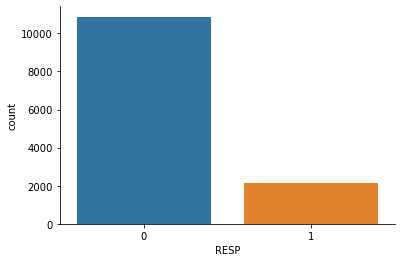

In [14]:
import seaborn as sns
sns.countplot(train['RESP'].astype(object))
sns.despine()

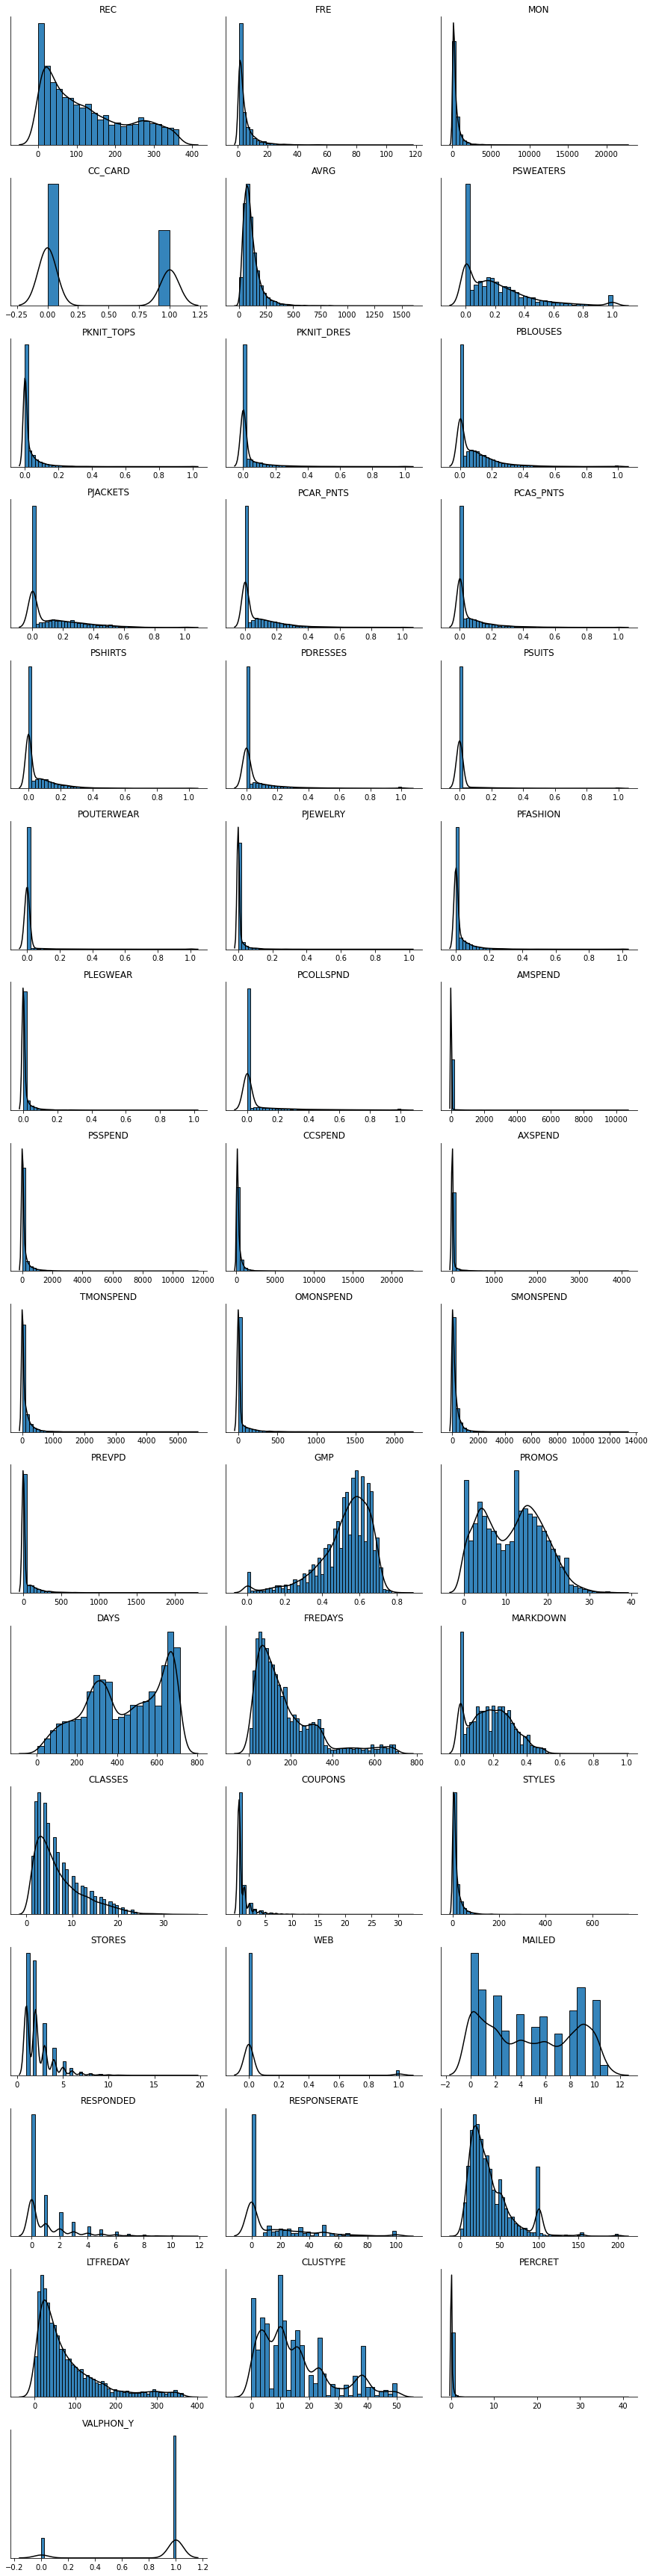

In [15]:
from statlearning import plot_dists
fig, ax = plot_dists(X_train)

### Heatmap for the fraction spent on product category.

<AxesSubplot:>

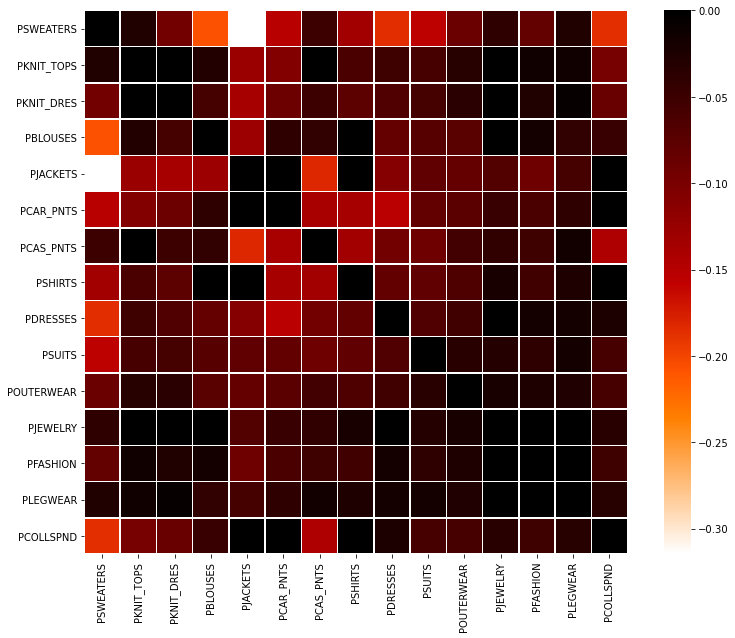

In [16]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(13,10))
sns.heatmap(train[['PSWEATERS','PKNIT_TOPS','PKNIT_DRES','PBLOUSES','PJACKETS','PCAR_PNTS','PCAS_PNTS','PSHIRTS','PDRESSES','PSUITS','POUTERWEAR','PJEWELRY','PFASHION','PLEGWEAR','PCOLLSPND']].corr(), linewidth=.5, vmax=.0, square=True, cmap="gist_heat_r")

# 2. Feature Engineering


### Outlier dummy variables

In [17]:
# Due to the offset threshold of -1.5
X_train['outlierdummy'] = np.where(X_scores<-1.5,1,0)

# To populate these columns
X_val['outlierdummy'] = 0
test['outlierdummy'] = 0

### Interaction effects according to the heatmap

In [18]:
# Train
X_train['PKNIT_TOPSXPKNIT_DRES'] = X_train['PKNIT_TOPS']*X_train['PKNIT_DRES']
X_train['PJACKETSXPCAR_PNTS'] = X_train['PJACKETS']*X_train['PCAR_PNTS']
X_train['PJEWELRYXPFASHIONXPLEGWEAR'] = X_train['PJEWELRY']*X_train['PFASHION']*X_train['PLEGWEAR']

# Validation and test (should I fill these with 0 or as in train?)
X_val['PKNIT_TOPSXPKNIT_DRES'] = X_val['PKNIT_TOPS']*X_val['PKNIT_DRES']
X_val['PJACKETSXPCAR_PNTS'] = X_val['PJACKETS']*X_val['PCAR_PNTS']
X_val['PJEWELRYXPFASHIONXPLEGWEAR'] = X_val['PJEWELRY']*X_val['PFASHION']*X_val['PLEGWEAR']

test['PKNIT_TOPSXPKNIT_DRES'] = test['PKNIT_TOPS']*test['PKNIT_DRES']
test['PJACKETSXPCAR_PNTS'] = test['PJACKETS']*test['PCAR_PNTS']
test['PJEWELRYXPFASHIONXPLEGWEAR'] = test['PJEWELRY']*test['PFASHION']*test['PLEGWEAR']

### Yeo-Johnson Transformation on Predictors

Since quite a few of the predictors are right-skewed, applying a Yeo-Johnson transformation should help correct for this non-normality.

In [19]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson
yj = PowerTransformer(method='yeo-johnson') # YJ is the default, this function also does Box-Cox
X_train = yj.fit_transform(X_train)
X_val = yj.transform(X_val)
X_train = pd.DataFrame(X_train)
X_val = pd.DataFrame(X_val)

y_test = test['RESP']
features_x = test.loc[:, test.columns != 'RESP']
X_test = yj.fit_transform(features_x)
X_test = pd.DataFrame(X_test)

### Checking for change in distribution of predictors

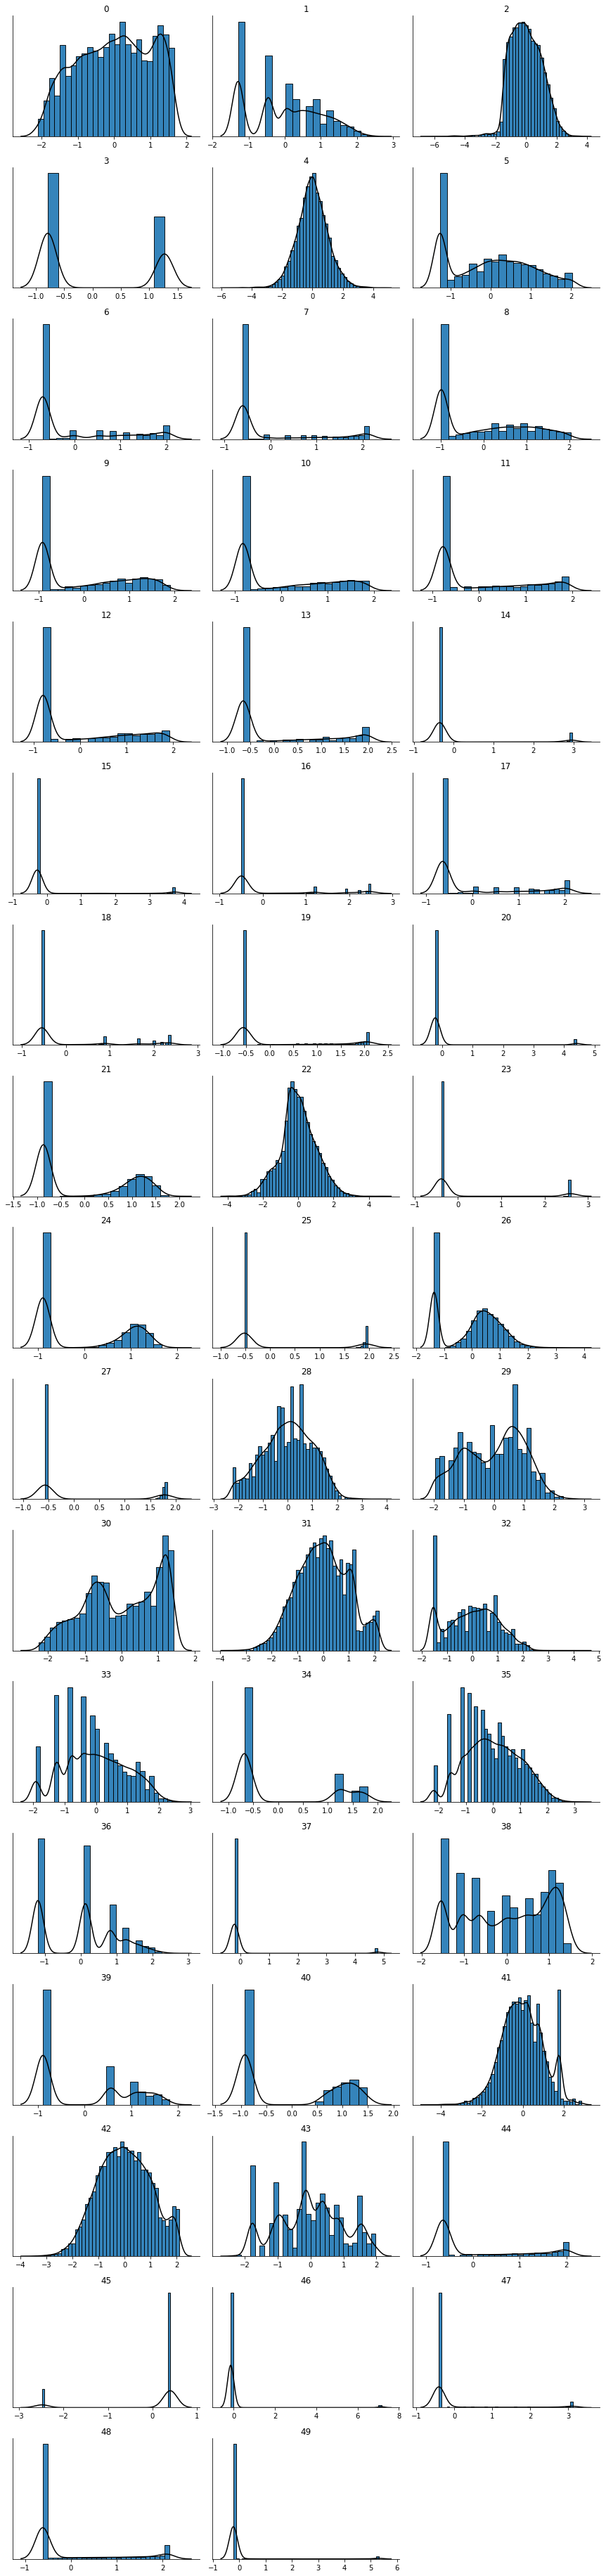

In [20]:
fig, ax = plot_dists(X_train)

# 3. Linear Model

### Elastic Net Cross Validation and Model

In [21]:
from sklearn.linear_model import LogisticRegression

lr_cv = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 1)

In [22]:
lr_cv.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr_cv.l1_ratio

1

### Validation Error rate

In [24]:
lrpredv = lr_cv.predict(X_val)

In [25]:
sum(abs(y_val - lrpredv))/len(y_val)

0.1391337677270985

### Validation scores

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_val, lrpredv))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.63      0.35      0.45       425

    accuracy                           0.86      2609
   macro avg       0.76      0.66      0.69      2609
weighted avg       0.84      0.86      0.84      2609



### Test Error rate

In [27]:
lrpred = lr_cv.predict(X_test)

In [28]:
sum(abs(y_test - lrpred))/len(y_test)

0.14155933762649495

### Test scores

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7252
           1       0.65      0.32      0.43      1444

    accuracy                           0.86      8696
   macro avg       0.76      0.64      0.67      8696
weighted avg       0.84      0.86      0.84      8696



# 4. Tree-based model

### XGBoost

In [30]:
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [31]:
from xgboost import XGBClassifier

model = XGBClassifier()

search_space = {
    'reg_lambda': Real(1e-10, 1e12, 'log-uniform'),
    'learning_rate': Real(0.005, 0.1),
    'n_estimators' : Integer(100, 5000),
    'max_depth' : Integer(2, 8),
    'subsample' : Real(0.5, 1.0),
    'colsample_bytree' : Real(0.25, 1.0),
}

xgb_opt =  BayesSearchCV(model, search_space, cv = 5,  n_iter= 8, scoring = 'neg_mean_squared_error', n_jobs=-1)

In [32]:
print('Warning: Optimising and fitting XGBoost will take at least 40 minutes.')
optimise = str(input('Would you like to optimise and fit XGBoost? Answer \'C\' to continue.'))

if optimise.lower() == 'c':
    model = xgb_opt.fit(X_train, y_train)
    xgb_opt.best_params_

Would you like to optimise and fit XGBoost? Answer 'C' to continue. C


[12:35:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
xgb_opt.best_params_

OrderedDict([('colsample_bytree', 0.7012486140201625),
             ('learning_rate', 0.01730002785667402),
             ('max_depth', 3),
             ('n_estimators', 629),
             ('reg_lambda', 2.750046458491444e-08),
             ('subsample', 0.5462477145579053)])

In [34]:
xgboost = xgb_opt.best_estimator_

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf=KFold(5) 
score = cross_val_score(xgboost, X_val, y_val, cv=kf, scoring = 'neg_mean_squared_error')
print("xgboost: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print(np.sqrt(-score)) #scores for each fold

[12:38:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:38:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

### Validation Error rate

In [38]:
xgbpredv = xgboost.predict(X_val)

In [39]:
xgbpredv.shape

(2609,)

In [40]:
sum(abs(y_val - xgbpredv))/len(y_val)

0.14105021080873897

### Validation scores

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_val, xgbpredv))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.63      0.32      0.43       425

    accuracy                           0.86      2609
   macro avg       0.76      0.64      0.67      2609
weighted avg       0.84      0.86      0.84      2609



### Test Error rate

In [42]:
xgbpred = xgboost.predict(X_test)

In [43]:
sum(abs(y_test - xgbpred))/len(y_test)

0.1424793008279669

### Test scores

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, xgbpred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7252
           1       0.67      0.28      0.40      1444

    accuracy                           0.86      8696
   macro avg       0.77      0.63      0.66      8696
weighted avg       0.84      0.86      0.83      8696



# 5. Neural Network

In [45]:
from tensorflow import keras
from tensorflow.keras import layers

# Inputs
inputs = keras.Input(shape=(X_train.shape[1],))

# Hidden layers
# The SELU slows things down quite a bit, consider changing to ReLU if this is an issue
# Use the Lecun normal initialisation with the SELU
hidden1 = layers.Dense(128, kernel_initializer='lecun_normal', activation='selu')(inputs)
hidden2 = layers.Dense(128, kernel_initializer='lecun_normal', activation='selu')(hidden1)
hidden3  = layers.Dense(128, kernel_initializer='lecun_normal', activation='selu')(hidden2)

# Output layers
output = layers.Dense(1, activation='sigmoid')(hidden3)

# Build model
dfn = keras.Model(inputs=inputs, outputs=output)
dfn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               6528      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 39,681
Trainable params: 39,681
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.optimizers import Adam

# These are additional metrics that we will keep track of during training (for the training and validation sets)
metrics = [
    keras.metrics.Recall(name="sensitivity"),
    keras.metrics.Precision(name="precision"),  
]

# A callback is an object that implements actions at different stages of training (typically at every epoch)
# This callback will stop training when the validation error does not improve for `5 epochs
# The restore best weights option returns the model from the best epoch up to that point
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, 
                                         patience=5, verbose=1)

# We set the learning rate for the Adam optimizer to 
dfn.compile(loss='binary_crossentropy', optimizer=Adam(1e-3), metrics=metrics)
dfn.fit(X_train, 
        y_train, 
        epochs=50,
        batch_size=1024, 
        validation_data =(X_val, y_val), 
        callbacks = [earlystopping],
        verbose=2)

Train on 10435 samples, validate on 2609 samples
Epoch 1/50
10435/10435 - 1s - loss: 0.5744 - sensitivity: 0.5172 - precision: 0.2904 - val_loss: 0.4091 - val_sensitivity: 0.3671 - val_precision: 0.4419
Epoch 2/50
10435/10435 - 0s - loss: 0.3890 - sensitivity: 0.2560 - precision: 0.4491 - val_loss: 0.3576 - val_sensitivity: 0.2235 - val_precision: 0.5864
Epoch 3/50
10435/10435 - 0s - loss: 0.3520 - sensitivity: 0.2497 - precision: 0.5769 - val_loss: 0.3349 - val_sensitivity: 0.3176 - val_precision: 0.5947
Epoch 4/50
10435/10435 - 0s - loss: 0.3343 - sensitivity: 0.3106 - precision: 0.6197 - val_loss: 0.3283 - val_sensitivity: 0.3929 - val_precision: 0.5943
Epoch 5/50
10435/10435 - 0s - loss: 0.3279 - sensitivity: 0.3731 - precision: 0.6069 - val_loss: 0.3289 - val_sensitivity: 0.3082 - val_precision: 0.6179
Epoch 6/50
10435/10435 - 0s - loss: 0.3222 - sensitivity: 0.3255 - precision: 0.6495 - val_loss: 0.3257 - val_sensitivity: 0.3812 - val_precision: 0.6000
Epoch 7/50
10435/10435 - 0s

### Validation error rate

In [47]:
dfnpredv = dfn.predict(X_val)

In [48]:
dfnpredv

array([[0.03214273],
       [0.10125357],
       [0.27300125],
       ...,
       [0.00742921],
       [0.04045948],
       [0.03628386]], dtype=float32)

In [49]:
dfnpredv.ravel()

array([0.03214273, 0.10125357, 0.27300125, ..., 0.00742921, 0.04045948,
       0.03628386], dtype=float32)

In [50]:
sum(abs(y_val - dfnpredv.ravel()))/len(y_val)

0.20232790866606123

### Validation scores

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, log_loss, average_precision_score, f1_score

columns=['Relative Risk', 'Error rate', 'Sensitivity', 'Specificity', 
         'Precision', 'Average Precision','F1 Score']
rows=['DFN']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[dfn]

lfp = 1
lfn = 10
tau = lfp/(lfp+lfn)

for i, method in enumerate(methods):
    
    if method in [dfn]:
        y_prob = method.predict(X_val)
    else:
        y_prob = method.predict_proba(X_val)[:,1]

    y_pred = (y_prob>tau).astype(int)
       
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    results.iloc[i,0]=  (fp*lfp+fn*lfn)/len(y_val)
    results.iloc[i,1]=  1 - accuracy_score(y_val, y_pred)
    results.iloc[i,2]=  tp/(tp+fn)
    results.iloc[i,3]=  tn/(tn+fp)
    results.iloc[i,4]=  precision_score(y_val, y_pred)
    results.iloc[i,5]=  average_precision_score(y_val, y_prob)
    results.iloc[i,6]=  f1_score(y_val, y_pred)

results.iloc[:,0] /= results.iloc[0,0]
results.round(3)

,Relative Risk,Error rate,Sensitivity,Specificity,Precision,Average Precision,F1 Score
DFN,1.0,0.351,0.906,0.598,0.305,0.544,0.456


# 6. Additional models

### 6.1 Code for the best additional model

### KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'p': (1,2),
    'n_neighbors': (3,5,7,9,11),
    'weights' : ('uniform', 'distance'),
    'metric' : ('euclidean', 'manhattan')
}

grid_cv_obj = GridSearchCV(model, param_grid)
grid_cv_obj.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': (3, 5, 7, 9, 11), 'p': (1, 2),
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
knn = grid_cv_obj.best_estimator_
print(knn)
print(grid_cv_obj.best_params_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                     weights='uniform')
{'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


In [55]:
score = cross_val_score(knn, X_val, y_val, cv=kf, scoring = 'neg_mean_squared_error')
print("knn: {:.4f} ({:.4f})".format(score.mean(), score.std()))
print(np.sqrt(-score)) #scores for each fold

knn: -0.1587 (0.0102)
[0.41752785 0.38655567 0.40114778 0.4035285  0.38193366]


### Validation error rate

In [56]:
knnpredv = knn.predict(X_val)

In [57]:
sum(abs(y_val - knnpredv))/len(y_val)

0.15753162131084708

### Validation scores

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_val, knnpredv))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2184
           1       0.54      0.24      0.33       425

    accuracy                           0.84      2609
   macro avg       0.70      0.60      0.62      2609
weighted avg       0.81      0.84      0.82      2609



### Test error rate

In [59]:
knnpred = knn.predict(X_test)

In [60]:
sum(abs(y_test - knnpred))/len(y_test)

0.15788868445262189

### Test scores

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7252
           1       0.57      0.20      0.30      1444

    accuracy                           0.84      8696
   macro avg       0.71      0.59      0.61      8696
weighted avg       0.81      0.84      0.81      8696



# 7. Model selection

### 7.1 Code

### Simple benchmark

In [62]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver='liblinear', random_state=0)
LogR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Validation error rate

In [63]:
LogRpredv = LogR.predict(X_val)

In [64]:
sum(abs(y_val - LogRpredv))/len(y_val)

0.1399003449597547

### 7.2 Results

Code that displays any tables should go here.

### Validation Scores

### Benchmark

In [65]:
print(classification_report(y_val, LogRpredv))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.63      0.35      0.45       425

    accuracy                           0.86      2609
   macro avg       0.76      0.65      0.68      2609
weighted avg       0.84      0.86      0.84      2609



### Elastic Net

In [66]:
print(classification_report(y_val, lrpredv))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.63      0.35      0.45       425

    accuracy                           0.86      2609
   macro avg       0.76      0.66      0.69      2609
weighted avg       0.84      0.86      0.84      2609



### XGBoost

In [67]:
print(classification_report(y_val, xgbpredv))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2184
           1       0.63      0.32      0.43       425

    accuracy                           0.86      2609
   macro avg       0.76      0.64      0.67      2609
weighted avg       0.84      0.86      0.84      2609



### Deep Feedforward Network

In [68]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, log_loss, average_precision_score, f1_score

columns=['Relative Risk', 'Error rate', 'Sensitivity', 'Specificity', 
         'Precision', 'Average Precision','F1 Score']
rows=['DFN']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[dfn]

lfp = 1
lfn = 10
tau = lfp/(lfp+lfn)

for i, method in enumerate(methods):
    
    if method in [dfn]:
        y_prob = method.predict(X_val)
    else:
        y_prob = method.predict_proba(X_val)[:,1]

    y_pred = (y_prob>tau).astype(int)
       
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    results.iloc[i,0]=  (fp*lfp+fn*lfn)/len(y_val)
    results.iloc[i,1]=  1 - accuracy_score(y_val, y_pred)
    results.iloc[i,2]=  tp/(tp+fn)
    results.iloc[i,3]=  tn/(tn+fp)
    results.iloc[i,4]=  precision_score(y_val, y_pred)
    results.iloc[i,5]=  average_precision_score(y_val, y_prob)
    results.iloc[i,6]=  f1_score(y_val, y_pred)

results.iloc[:,0] /= results.iloc[0,0]
results.round(3)

,Relative Risk,Error rate,Sensitivity,Specificity,Precision,Average Precision,F1 Score
DFN,1.0,0.351,0.906,0.598,0.305,0.544,0.456


### kNN Classifier

In [69]:
print(classification_report(y_val, knnpredv))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2184
           1       0.54      0.24      0.33       425

    accuracy                           0.84      2609
   macro avg       0.70      0.60      0.62      2609
weighted avg       0.81      0.84      0.82      2609



# 8. Model Evaluation

### 8.1 Code

### Benchmark test error rate

In [70]:
LogRpred = LogR.predict(X_test)
sum(abs(y_test - LogRpred))/len(y_test)

0.14132934682612697

### 8.2 Results

Code that displays any tables should go here.

### Test set results

### Benchmark

In [71]:
print(classification_report(y_test, LogRpred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7252
           1       0.65      0.32      0.43      1444

    accuracy                           0.86      8696
   macro avg       0.76      0.64      0.67      8696
weighted avg       0.84      0.86      0.84      8696



### Elastic Net

In [72]:
print(classification_report(y_test, lrpred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      7252
           1       0.65      0.32      0.43      1444

    accuracy                           0.86      8696
   macro avg       0.76      0.64      0.67      8696
weighted avg       0.84      0.86      0.84      8696



### XGBoost

In [73]:
print(classification_report(y_test, xgbpred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      7252
           1       0.67      0.28      0.40      1444

    accuracy                           0.86      8696
   macro avg       0.77      0.63      0.66      8696
weighted avg       0.84      0.86      0.83      8696



### Deep Feedforward Network

In [74]:
dfnpred = dfn.predict(X_test)

In [75]:
sum(abs(y_test - dfnpred.ravel()))/len(y_test)

0.2075945645461087

In [76]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, log_loss, average_precision_score, f1_score

columns=['Relative Risk', 'Error rate', 'Sensitivity', 'Specificity', 
         'Precision', 'Average Precision','F1 Score']
rows=['DFN']
results=pd.DataFrame(0.0, columns=columns, index=rows) 

methods=[dfn]

lfp = 1
lfn = 10
tau = lfp/(lfp+lfn)

for i, method in enumerate(methods):
    
    if method in [dfn]:
        y_prob = method.predict(X_test)
    else:
        y_prob = method.predict_proba(X_test)[:,1]

    y_pred = (y_prob>tau).astype(int)
       
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    results.iloc[i,0]=  (fp*lfp+fn*lfn)/len(y_test)
    results.iloc[i,1]=  1 - accuracy_score(y_test, y_pred)
    results.iloc[i,2]=  tp/(tp+fn)
    results.iloc[i,3]=  tn/(tn+fp)
    results.iloc[i,4]=  precision_score(y_test, y_pred)
    results.iloc[i,5]=  average_precision_score(y_test, y_prob)
    results.iloc[i,6]=  f1_score(y_test, y_pred)

results.iloc[:,0] /= results.iloc[0,0]
results.round(3)

,Relative Risk,Error rate,Sensitivity,Specificity,Precision,Average Precision,F1 Score
DFN,1.0,0.359,0.889,0.592,0.302,0.519,0.451


### kNN Classifier

In [77]:
print(classification_report(y_test, knnpred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7252
           1       0.57      0.20      0.30      1444

    accuracy                           0.84      8696
   macro avg       0.71      0.59      0.61      8696
weighted avg       0.81      0.84      0.81      8696

